In [1038]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

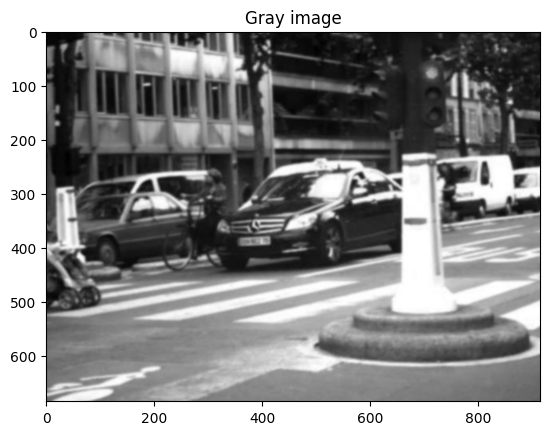

In [1039]:
img = cv.imread('merah.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.title("Gray image")
plt.imshow(gray, cmap="gray")

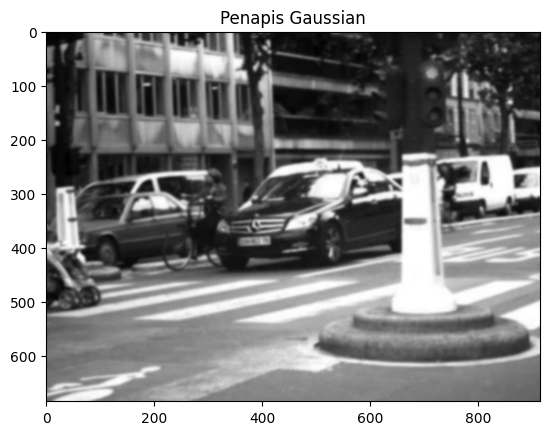

In [1040]:
blurred = cv.GaussianBlur(gray, (5, 5), 0)
plt.title("Penapis Gaussian")
plt.imshow(blurred, cmap="gray")

plt.show()

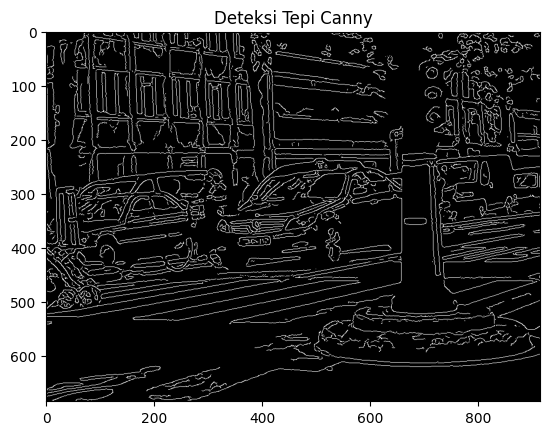

In [1041]:
edges = cv.Canny(blurred, 50, 0)
plt.title("Deteksi Tepi Canny")
plt.imshow(edges, cmap="gray")

plt.show()

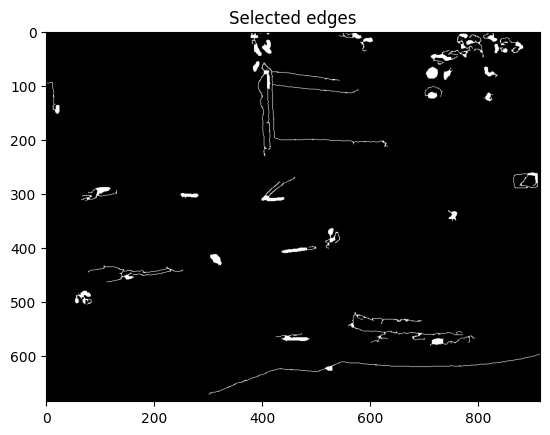

In [1042]:
kernel = np.ones((3, 3), np.uint8)
dilated = cv.dilate(edges, kernel, iterations=1)
eroded = cv.erode(dilated, kernel, iterations=1)
contours, _ = cv.findContours(eroded, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
selected_edges = np.zeros_like(eroded)
min_area = 100
max_area = 350

for contour in contours:
    area = cv.contourArea(contour)
    if min_area < area < max_area:
        cv.drawContours(selected_edges, [contour], -1, (255), thickness=cv.FILLED)

plt.title("Selected edges")
plt.imshow(selected_edges, cmap="gray")

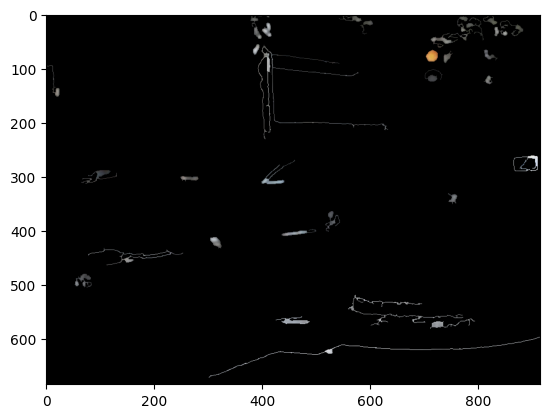

In [1043]:
masked = cv.bitwise_and(img, img, mask=selected_edges)
plt.imshow(cv.cvtColor(masked, cv.COLOR_BGR2RGB))

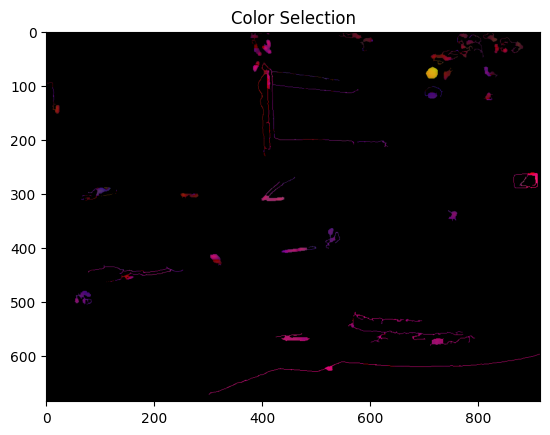

In [1044]:
hsv = cv.cvtColor(masked, cv.COLOR_BGR2HSV)
lower_hue = 0
upper_hue = 150
mask = cv.inRange(hsv, (lower_hue, 0, 0), (upper_hue, 255, 255))
masked_img = cv.bitwise_and(hsv, hsv, mask=mask)
plt.title("Color Selection")
plt.imshow(cv.cvtColor(masked_img, cv.COLOR_BGR2RGB))
plt.show()

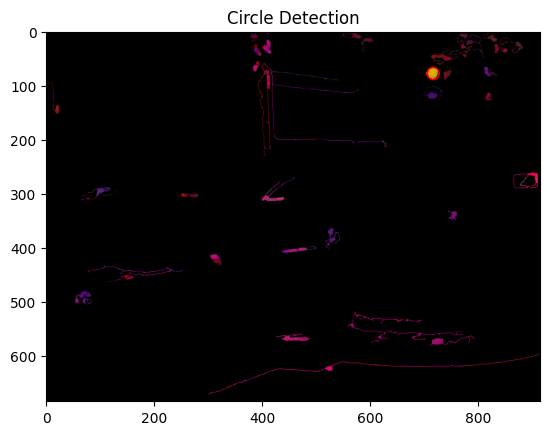

In [1045]:
gray = cv.cvtColor(masked_img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 0)
circles = cv.HoughCircles(edges, cv.HOUGH_GRADIENT, dp=1, minDist=10, param1=15, param2=15, minRadius=10, maxRadius=20)

circle_detection = masked_img.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv.circle(circle_detection, center, radius, (0, 0, 255), thickness=2)
plt.title("Circle Detection")
plt.imshow(cv.cvtColor(circle_detection, cv.COLOR_BGR2RGB))
plt.show()

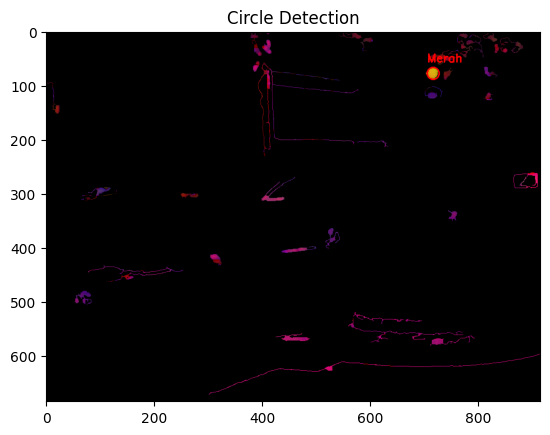

In [1046]:
hue = circle_detection[circle[1], circle[0], 0]
if hue < 30:
    color = "Merah"
elif hue > 90:
    color = "Hijau"
else:
    color = "Kuning"

cv.putText(circle_detection, color, (circle[0] - radius, circle[1] - radius - 10),
           cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), thickness=2)

plt.title("Circle Detection")
plt.imshow(cv.cvtColor(circle_detection, cv.COLOR_BGR2RGB))

plt.show()